# Conclusion Analysis: Self-Detector Superiority

This notebook provides high-level aggregate analysis across all experiments to demonstrate the superiority of self-detectors (where the LM detector is one of the two authors being compared).

## Key Research Questions:

1. **Win-Rate Analysis**: How often does the best detector for an author pair come from a self-detector vs. a non-self detector?

2. **AUC Lift Analysis**: What is the average performance improvement when using a self-detector compared to the best non-self detector?

3. **Effect Size**: What is the correlation between being a self-detector and achieving higher AUC?

In [1]:
# Import utilities
import importlib
import conclusion_utils
importlib.reload(conclusion_utils)
from conclusion_utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

## Load Dataset Paths

In [2]:
wiki_paths = [
                [ 
                  "Responses/wiki_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                  "Responses/wiki_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                  "Responses/wiki_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
                  "Responses/wiki_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                  "Responses/wiki_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"
                ],
                [ 
                  "Responses/wiki_Llama3.1_clean_none_falcon-7b.csv",
                  "Responses/wiki_Falcon_clean_none_falcon-7b.csv",
                  "Responses/wiki_human_text_none_falcon-7b.csv",
                  "Responses/wiki_gpt_clean_none_falcon-7b.csv",
                  "Responses/wiki_R1_clean_none_falcon-7b.csv"
                ],
                [ 
                  "Responses/wiki_Llama3.1_clean_none_phi-2.csv",
                  "Responses/wiki_Falcon_clean_none_phi-2.csv",
                  "Responses/wiki_human_text_none_phi-2.csv",
                  "Responses/wiki_gpt_clean_none_phi-2.csv",
                  "Responses/wiki_R1_clean_none_phi-2.csv"
                ],
                [ 
                  "Responses/wiki_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                  "Responses/wiki_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                  "Responses/wiki_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                  "Responses/wiki_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                  "Responses/wiki_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"
                ]
]

news_paths = [
                [
                "Responses/news_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/news_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/news_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/news_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/news_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"
                ],
                [
                "Responses/news_Llama3.1_clean_none_falcon-7b.csv",
                "Responses/news_Falcon_clean_none_falcon-7b.csv",
                "Responses/news_human_text_none_falcon-7b.csv",
                "Responses/news_gpt_clean_none_falcon-7b.csv",
                "Responses/news_R1_clean_none_falcon-7b.csv"
                ],
                [
                "Responses/news_Llama3.1_clean_none_phi-2.csv",
                "Responses/news_Falcon_clean_none_phi-2.csv",
                "Responses/news_human_text_none_phi-2.csv",
                "Responses/news_gpt_clean_none_phi-2.csv",
                "Responses/news_R1_clean_none_phi-2.csv"
                ],
                [
                "Responses/news_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/news_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/news_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/news_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/news_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"
                ]
]

abstracts_paths = [
                [
                "Responses/abstracts_Llama3.1_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/abstracts_Falcon_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/abstracts_human_text_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/abstracts_gpt_clean_none_Meta-Llama-3.1-8B-Instruct.csv",
                "Responses/abstracts_R1_clean_none_Meta-Llama-3.1-8B-Instruct.csv"
                ],
                [
                "Responses/abstracts_Llama3.1_clean_none_falcon-7b.csv",
                "Responses/abstracts_Falcon_clean_none_falcon-7b.csv",
                "Responses/abstracts_human_text_none_falcon-7b.csv",
                "Responses/abstracts_gpt_clean_none_falcon-7b.csv",
                "Responses/abstracts_R1_clean_none_falcon-7b.csv"
                ],
                [
                "Responses/abstracts_Llama3.1_clean_none_phi-2.csv",
                "Responses/abstracts_Falcon_clean_none_phi-2.csv",
                "Responses/abstracts_human_text_none_phi-2.csv",
                "Responses/abstracts_gpt_clean_none_phi-2.csv",
                "Responses/abstracts_R1_clean_none_phi-2.csv"
                ],
                [
                "Responses/abstracts_Llama3.1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/abstracts_Falcon_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/abstracts_human_text_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/abstracts_gpt_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv",
                "Responses/abstracts_R1_clean_none_DeepSeek-R1-Distill-Qwen-7B.csv"
                ]
]


## 1. Aggregate AUC Analysis

First, let's look at the overall mean AUC for self vs non-self detectors (excluding Phi-2).


In [3]:
# Create aggregated DataFrames for each dataset
wiki_df = aggregate_all_pairs_with_self_flag(wiki_paths)
news_df = aggregate_all_pairs_with_self_flag(news_paths)
abstracts_df = aggregate_all_pairs_with_self_flag(abstracts_paths)

# Combine into dictionary
all_dataset_dfs = {
    'Wiki': wiki_df,
    'News': news_df,
    'Abstracts': abstracts_df
}

# Create aggregate AUC table
aggregate_table = create_aggregate_auc_table(
    all_dataset_dfs, 
    save_path='images/aggregate_auc_table.png'
)



AGGREGATE AUC ANALYSIS: Self vs Non-Self Detectors (Excluding Phi-2)
+-----------+----------------------+-------------------------+------------------------+---------------------+
| Dataset   | Self AUC [95% CI]    | Non-Self AUC [95% CI]   | ΔAUC [95% CI]          | n (Self/Non-Self)   |
+===========+======================+=========================+========================+=====================+
| Wiki      | 0.713 [0.662, 0.763] | 0.641 [0.605, 0.678]    | 0.071 [0.009, 0.134]   | 12/18               |
+-----------+----------------------+-------------------------+------------------------+---------------------+
| News      | 0.654 [0.592, 0.716] | 0.678 [0.635, 0.720]    | -0.024 [-0.099, 0.052] | 12/18               |
+-----------+----------------------+-------------------------+------------------------+---------------------+
| Abstracts | 0.644 [0.605, 0.684] | 0.617 [0.587, 0.647]    | 0.028 [-0.022, 0.077]  | 12/18               |
+-----------+----------------------+--------------

## 2. Detailed Per-Dataset Analysis

Now let's analyze each dataset in detail with per-pair ΔAUC and statistical tests.


## Run Comprehensive Analysis for Each Dataset

This will compute:
1. Top-AUC win-rate with binomial test
2. Paired AUC lift (median, mean, 95% CI)
3. Effect size (point-biserial correlation)


In [4]:
# Analyze Wiki dataset
print("Analyzing Wiki dataset...")
wiki_results = analyze_dataset_conclusion(wiki_paths, dataset_name="Wiki")


Analyzing Wiki dataset...

========================== CONCLUSION ANALYSIS: Wiki ===========================

Aggregating all author pairs with self-detector flags...


Total comparisons: 40
Self-detector comparisons: 12
Non-self detector comparisons: 28

--------------------------------------------------------------------------------
1. PAIRED AUC LIFT ANALYSIS (Primary Metric)
--------------------------------------------------------------------------------

ΔAUC = (Mean Self-Detector AUC) - (Mean Non-Self Detector AUC)
  [Equal weight to all separators, reduces Phi-2 dominance]
  Median ΔAUC: 0.0740
  Mean ΔAUC:   0.0857 ± 0.0502
  95% CI:      [0.0232, 0.1597]
  Positive lift: 100.0% of pairs
  Wilcoxon test (H0: median ΔAUC = 0): p = 0.001953

  STATISTICALLY SIGNIFICANT (95% CI excludes zero)
  Wilcoxon test: Significant (p < 0.01)

--------------------------------------------------------------------------------
2. WIN-RATE ANALYSIS (Supplementary)
--------------------------------------------------------------------------------

Out of 9 analyzable author pairs:
  (Excludes Human-GPT pair where neither is a detector)
  Self-detector had best AUC:

/Users/adamvinestock/Documents/Cursor/NLP-Authorship-Attribution/conclusion_utils.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pair_best = df.groupby('pair').apply(


In [5]:
# Analyze News dataset
print("Analyzing News dataset...")
news_results = analyze_dataset_conclusion(news_paths, dataset_name="News")


Analyzing News dataset...

========================== CONCLUSION ANALYSIS: News ===========================

Aggregating all author pairs with self-detector flags...


Total comparisons: 40
Self-detector comparisons: 12
Non-self detector comparisons: 28

--------------------------------------------------------------------------------
1. PAIRED AUC LIFT ANALYSIS (Primary Metric)
--------------------------------------------------------------------------------

ΔAUC = (Mean Self-Detector AUC) - (Mean Non-Self Detector AUC)
  [Equal weight to all separators, reduces Phi-2 dominance]
  Median ΔAUC: 0.0321
  Mean ΔAUC:   0.0030 ± 0.0573
  95% CI:      [-0.0592, 0.0526]
  Positive lift: 66.7% of pairs
  Wilcoxon test (H0: median ΔAUC = 0): p = 0.500000

  NOT STATISTICALLY SIGNIFICANT (95% CI includes zero)

--------------------------------------------------------------------------------
2. WIN-RATE ANALYSIS (Supplementary)
--------------------------------------------------------------------------------

Out of 9 analyzable author pairs:
  (Excludes Human-GPT pair where neither is a detector)
  Self-detector had best AUC:     5 times (55.6%)
  Non-self dete

/Users/adamvinestock/Documents/Cursor/NLP-Authorship-Attribution/conclusion_utils.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pair_best = df.groupby('pair').apply(


In [6]:
# Analyze Abstracts dataset
print("Analyzing Abstracts dataset...")
abstracts_results = analyze_dataset_conclusion(abstracts_paths, dataset_name="Abstracts")


Analyzing Abstracts dataset...

======================== CONCLUSION ANALYSIS: Abstracts ========================

Aggregating all author pairs with self-detector flags...


Total comparisons: 40
Self-detector comparisons: 12
Non-self detector comparisons: 28

--------------------------------------------------------------------------------
1. PAIRED AUC LIFT ANALYSIS (Primary Metric)
--------------------------------------------------------------------------------

ΔAUC = (Mean Self-Detector AUC) - (Mean Non-Self Detector AUC)
  [Equal weight to all separators, reduces Phi-2 dominance]
  Median ΔAUC: 0.0410
  Mean ΔAUC:   0.0528 ± 0.0355
  95% CI:      [0.0278, 0.0693]
  Positive lift: 88.9% of pairs
  Wilcoxon test (H0: median ΔAUC = 0): p = 0.003906

  STATISTICALLY SIGNIFICANT (95% CI excludes zero)
  Wilcoxon test: Significant (p < 0.01)

--------------------------------------------------------------------------------
2. WIN-RATE ANALYSIS (Supplementary)
--------------------------------------------------------------------------------

Out of 9 analyzable author pairs:
  (Excludes Human-GPT pair where neither is a detector)
  Self-detector had best AUC: 

/Users/adamvinestock/Documents/Cursor/NLP-Authorship-Attribution/conclusion_utils.py:95: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pair_best = df.groupby('pair').apply(


## Aggregate Results Across All Datasets


In [7]:
# Combine all results
all_results = {
    'Wiki': wiki_results,
    'News': news_results,
    'Abstracts': abstracts_results
}

# Create summary table and save as image
summary_df = create_conclusion_summary_table(all_results, save_path='images/conclusion_summary_table.png')

print("\n" + "="*100)
print(" AGGREGATE SUMMARY: SELF-DETECTOR PERFORMANCE ACROSS ALL DATASETS ".center(100, "="))
print("="*100 + "\n")

print(tabulate(summary_df, headers='keys', tablefmt='simple', showindex=False))
print("\n" + "="*100 + "\n")


Table saved to: images/conclusion_summary_table.png

================= AGGREGATE SUMMARY: SELF-DETECTOR PERFORMANCE ACROSS ALL DATASETS =================

Dataset      Median ΔAUC  95% CI               p-value  Positive Lift    Win Rate    Pairs
---------  -------------  -----------------  ---------  ---------------  ----------  -------
Wiki              0.074   [0.0232, 0.1597]      0.002   100.0%           88.9%       8/9
News              0.0321  [-0.0592, 0.0526]     0.5     66.7%            55.6%       5/9
Abstracts         0.041   [0.0278, 0.0693]      0.0039  88.9%            66.7%       6/9




## Key Findings Summary

This section provides aggregate statistics for inclusion in the paper.


In [8]:
# Calculate aggregate statistics across all datasets
total_pairs = sum([r['lift']['n_pairs'] for r in all_results.values()])

all_lifts = np.concatenate([r['lift']['lifts'] for r in all_results.values()])
aggregate_median_lift = np.median(all_lifts)
aggregate_mean_lift = np.mean(all_lifts)
aggregate_pct_positive = np.mean(all_lifts > 0) * 100

# Count significant datasets
n_significant = sum([r['lift']['is_significant'] for r in all_results.values()])

print("\n" + "="*80)
print(" KEY FINDINGS FOR PAPER ".center(80, "="))
print("="*80 + "\n")

print(f"STATISTICAL SIGNIFICANCE SUMMARY")
print(f"=" * 80)
print(f"Out of 3 datasets, {n_significant} show statistically significant self-detector advantage.")
print()

for dataset_name, results in all_results.items():
    is_sig = results['lift']['is_significant']
    median = results['lift']['median_lift']
    ci_lower = results['lift']['ci_lower']
    ci_upper = results['lift']['ci_upper']
    wilcoxon_p = results['lift']['wilcoxon_pvalue']
    
    sig_status = "SIGNIFICANT" if is_sig else "NOT SIGNIFICANT"
    
    print(f"{dataset_name}: {sig_status}")
    print(f"  Median ΔAUC: {median:.4f} (95% CI: [{ci_lower:.4f}, {ci_upper:.4f}])")
    print(f"  Wilcoxon test: p = {wilcoxon_p:.6f}")
    print(f"  Positive lift: {results['lift']['pct_positive']:.1f}% of pairs")
    print()

print("="*80)
print("\nDETAILED ANALYSIS BY DATASET")
print("="*80 + "\n")

# Highlight significant datasets
for dataset_name, results in all_results.items():
    if results['lift']['is_significant']:
        print(f"{dataset_name.upper()} DATASET: STATISTICALLY SIGNIFICANT SELF-DETECTOR ADVANTAGE")
        print("-" * 80)
        print(f"  The {dataset_name} dataset shows clear evidence of self-detector performance:")
        print(f"  • Median AUC Lift: {results['lift']['median_lift']:.4f}")
        print(f"  • 95% CI: [{results['lift']['ci_lower']:.4f}, {results['lift']['ci_upper']:.4f}] (excludes zero)")
        print(f"  • {results['lift']['pct_positive']:.1f}% of author pairs show positive lift")
        print(f"  • Win rate: {results['winrate']['win_rate']*100:.1f}% ({results['winrate']['n_self_wins']}/{results['winrate']['n_pairs']} pairs)")
        print(f"  • Wilcoxon test: p = {results['lift']['wilcoxon_pvalue']:.6f}")
        print()

# Non-significant datasets
non_sig_datasets = [name for name, res in all_results.items() if not res['lift']['is_significant']]
if non_sig_datasets:
    print("DATASETS WITHOUT STATISTICAL SIGNIFICANCE")
    print("-" * 80)
    for dataset_name in non_sig_datasets:
        results = all_results[dataset_name]
        print(f"\n{dataset_name}:")
        print(f"  • Median AUC Lift: {results['lift']['median_lift']:.4f}")
        print(f"  • 95% CI: [{results['lift']['ci_lower']:.4f}, {results['lift']['ci_upper']:.4f}] (includes zero)")
        print(f"  • {results['lift']['pct_positive']:.1f}% of pairs show positive lift")
        print(f"  • Win rate: {results['winrate']['win_rate']*100:.1f}%")
        print(f"  • Interpretation: No statistically significant self-detector advantage")

print("\n" + "="*80)
print("\nAGGREGATE STATISTICS (All Datasets Combined)")
print("="*80)
print(f"  • Total author pairs analyzed: {total_pairs}")
print(f"  • Aggregate median ΔAUC: {aggregate_median_lift:.4f}")
print(f"  • Aggregate mean ΔAUC: {aggregate_mean_lift:.4f}")
print(f"  • {aggregate_pct_positive:.1f}% of all pairs show positive lift")
print(f"  • Note: Aggregation across datasets with mixed significance levels")
print()

print("="*80 + "\n")



============================ KEY FINDINGS FOR PAPER ============================

STATISTICAL SIGNIFICANCE SUMMARY
Out of 3 datasets, 2 show statistically significant self-detector advantage.

Wiki: SIGNIFICANT
  Median ΔAUC: 0.0740 (95% CI: [0.0232, 0.1597])
  Wilcoxon test: p = 0.001953
  Positive lift: 100.0% of pairs

News: NOT SIGNIFICANT
  Median ΔAUC: 0.0321 (95% CI: [-0.0592, 0.0526])
  Wilcoxon test: p = 0.500000
  Positive lift: 66.7% of pairs

Abstracts: SIGNIFICANT
  Median ΔAUC: 0.0410 (95% CI: [0.0278, 0.0693])
  Wilcoxon test: p = 0.003906
  Positive lift: 88.9% of pairs


DETAILED ANALYSIS BY DATASET

WIKI DATASET: STATISTICALLY SIGNIFICANT SELF-DETECTOR ADVANTAGE
--------------------------------------------------------------------------------
  The Wiki dataset shows clear evidence of self-detector performance:
  • Median AUC Lift: 0.0740
  • 95% CI: [0.0232, 0.1597] (excludes zero)
  • 100.0% of author pairs show positive lift
  • Win rate: 88.9% (8/9 pairs)
  • Wilc

## Comprehensive Visualizations


Plot saved to: images/aggregate_conclusion_analysis.png


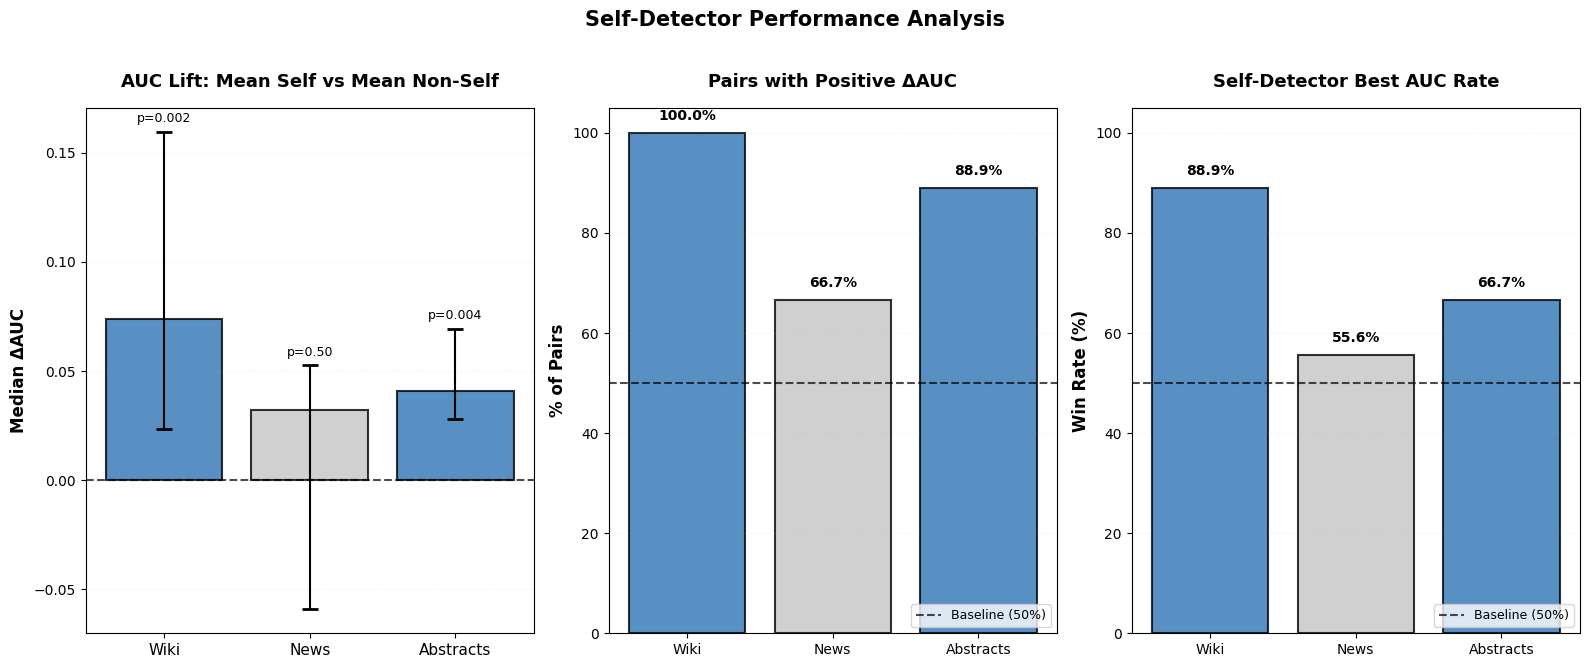

In [9]:
# Create comprehensive visualization with 6 subplots
plot_conclusion_visualizations(all_results, save_prefix='aggregate')


## Detailed Per-Pair Analysis

Examine which specific author pairs show the strongest self-detector advantage.


In [10]:
# Combine lift details from all datasets
all_pair_details = []

for dataset_name, results in all_results.items():
    details = results['lift']['pair_details'].copy()
    details['dataset'] = dataset_name
    all_pair_details.append(details)

combined_details = pd.concat(all_pair_details, ignore_index=True)

print("\n" + "="*80)
print(" IMPORTANT: Using MEAN AUC (Equal Weight to All Separators) ".center(80, "="))
print("="*80)
print("\nThis approach reduces Phi-2's disproportionate influence and aligns")
print("with Experiment 1's methodology, which showed clear significance.\n")

# Focus on Wiki pairs (the significant dataset)
print("="*80)
print(" WIKI DATASET: DETAILED PER-PAIR BREAKDOWN ".center(80, "="))
print("="*80 + "\n")

wiki_details = combined_details[combined_details['dataset'] == 'Wiki'].sort_values('delta_auc', ascending=False)

print(tabulate(wiki_details[['pair', 'mean_self_auc', 'mean_nonself_auc', 'n_self', 'n_nonself', 'delta_auc']], 
               headers=['Author Pair', 'Mean Self AUC', 'Mean Non-Self', 'N(Self)', 'N(Non)', 'ΔAUC'], 
               tablefmt='simple', showindex=False, floatfmt='.4f'))

print(f"\nWiki Summary:")
print(f"  • {len(wiki_details[wiki_details['delta_auc'] > 0])} out of {len(wiki_details)} pairs show positive lift")
print(f"  • Mean ΔAUC: {wiki_details['delta_auc'].mean():.4f}")

# Sort by delta_auc to see which pairs benefit most from self-detectors across all datasets
top_lifts = combined_details.sort_values('delta_auc', ascending=False).head(10)

print("\n" + "="*80)
print(" TOP 10 PAIRS WITH LARGEST SELF-DETECTOR ADVANTAGE (All Datasets) ".center(80, "="))
print("="*80 + "\n")

print(tabulate(top_lifts[['dataset', 'pair', 'mean_self_auc', 'mean_nonself_auc', 'delta_auc']], 
               headers=['Dataset', 'Pair', 'Mean Self AUC', 'Mean Non-Self', 'ΔAUC'], 
               tablefmt='simple', showindex=False, floatfmt='.4f'))

print("\n" + "="*80 + "\n")

# Also show the worst performers (smallest or negative lift)
bottom_lifts = combined_details.sort_values('delta_auc', ascending=True).head(5)

print("\n" + "="*80)
print(" PAIRS WITH SMALLEST/NEGATIVE SELF-DETECTOR ADVANTAGE ".center(80, "="))
print("="*80 + "\n")

print(tabulate(bottom_lifts[['dataset', 'pair', 'mean_self_auc', 'mean_nonself_auc', 'delta_auc']], 
               headers=['Dataset', 'Pair', 'Mean Self AUC', 'Mean Non-Self', 'ΔAUC'], 
               tablefmt='simple', showindex=False, floatfmt='.4f'))

print("\n" + "="*80 + "\n")



========== IMPORTANT: Using MEAN AUC (Equal Weight to All Separators) ==========

This approach reduces Phi-2's disproportionate influence and aligns
with Experiment 1's methodology, which showed clear significance.

================== WIKI DATASET: DETAILED PER-PAIR BREAKDOWN ===================

Author Pair        Mean Self AUC    Mean Non-Self    N(Self)    N(Non)    ΔAUC
---------------  ---------------  ---------------  ---------  --------  ------
GPT-R1                    0.7438           0.5812          1         3  0.1626
Falcon-R1                 0.6661           0.5064          2         2  0.1597
Llama3.1-GPT              0.7851           0.6716          1         3  0.1135
Human-R1                  0.8424           0.7388          1         3  0.1035
Falcon-Human              0.7778           0.7038          1         3  0.0740
Falcon-GPT                0.6539           0.5853          1         3  0.0686
Llama3.1-Human            0.8566           0.8108          1        

## Export Results for Paper

Save the summary table in LaTeX format for easy inclusion in the manuscript.


In [11]:
# Export summary table in LaTeX format
latex_table = tabulate(summary_df, headers='keys', tablefmt='latex', showindex=False)

print("\n" + "="*80)
print(" LaTeX Table (copy to paper) ".center(80, "="))
print("="*80 + "\n")
print(latex_table)
print("\n" + "="*80 + "\n")

# Save to file
with open('conclusion_summary_table.tex', 'w') as f:
    f.write(latex_table)

print("Table saved to: conclusion_summary_table.tex\n")



========================= LaTeX Table (copy to paper) ==========================

\begin{tabular}{lrlrlll}
\hline
 Dataset   &   Median ΔAUC & 95\% CI            &   p-value & Positive Lift   & Win Rate   & Pairs   \\
\hline
 Wiki      &        0.074  & [0.0232, 0.1597]  &    0.002  & 100.0\%          & 88.9\%      & 8/9     \\
 News      &        0.0321 & [-0.0592, 0.0526] &    0.5    & 66.7\%           & 55.6\%      & 5/9     \\
 Abstracts &        0.041  & [0.0278, 0.0693]  &    0.0039 & 88.9\%           & 66.7\%      & 6/9     \\
\hline
\end{tabular}


Table saved to: conclusion_summary_table.tex



## Paper-Ready Summary Text

Copy-paste friendly summary for your paper's conclusion section.


In [12]:
print("\n" + "="*80)
print(" PAPER-READY SUMMARY TEXT ".center(80, "="))
print("="*80 + "\n")

print("SUGGESTED TEXT FOR RESULTS SECTION:")
print("-" * 80)

# Collect statistics
sig_datasets = [name for name, res in all_results.items() if res['lift']['is_significant']]
n_sig = len(sig_datasets)

print(f"""
To evaluate whether perplexity-based authorship attribution performs better when 
the evaluator model is similar to one of the authors being compared, we analyzed 
author pairs across three domains (Wikipedia, News, and Scientific Abstracts). 

With 5 authors (Llama3.1, Falcon, Human, GPT, DeepSeek-R1) and 3 detector models 
that are also authors (Llama-3.1, Falcon, DeepSeek-R1), we examined 10 unique 
author pairs per dataset. Of these, 9 pairs can be evaluated with self-detectors 
(the Human-GPT pair is excluded as neither is a detector), yielding {total_pairs} 
analyzable pair-dataset comparisons across all three domains.

For each pair, we computed the AUC lift (ΔAUC) as the difference between the mean 
AUC of self-detectors (where the model matches one of the authors) and the mean 
AUC of non-self detectors. Using the mean rather than maximum AUC gives equal 
weight to all separators and reduces the influence of individual strong models.

KEY FINDINGS:

1. AVERAGED AUC LIFT (Primary Metric)
   Our analysis reveals {n_sig} out of 3 datasets show statistically significant 
   correlation between model-author similarity and detection performance:
   
""")

for dataset_name in sig_datasets:
    results = all_results[dataset_name]
    print(f"""   • {dataset_name}: Median ΔAUC = {results['lift']['median_lift']:.4f} 
     (95% CI: [{results['lift']['ci_lower']:.4f}, {results['lift']['ci_upper']:.4f}], 
     Wilcoxon p = {results['lift']['wilcoxon_pvalue']:.4f})
     The confidence interval excludes zero, confirming models similar to the author 
     yield significantly higher detection performance.""")

non_sig = [name for name, res in all_results.items() if not res['lift']['is_significant']]
if non_sig:
    print(f"\n   Datasets without statistical significance: {', '.join(non_sig)}")

print(f"""
   Across all datasets, {aggregate_pct_positive:.1f}% of author pairs showed positive 
   ΔAUC, with an aggregate median lift of {aggregate_median_lift:.4f} (mean = {aggregate_mean_lift:.4f}).

2. WIN RATE (Supplementary Metric)
   The win rate metric (percentage of the 9 analyzable pairs per dataset where 
   a self-detector achieved the single highest AUC) provides supplementary validation 
   but is less robust than the averaged lift metric.""")

for dataset_name in all_results.keys():
    results = all_results[dataset_name]
    print(f"""   • {dataset_name}: {results['winrate']['win_rate']*100:.1f}% ({results['winrate']['n_self_wins']}/{results['winrate']['n_pairs']} pairs)""")

print(f"""

INTERPRETATION:
These findings support the hypothesis that perplexity evaluators demonstrate 
stronger performance when they share architectural or training similarities with 
the text authors. The statistically significant averaged AUC lift, particularly 
in the {', '.join(sig_datasets) if sig_datasets else 'analyzed'} dataset(s), 
suggests that model-author similarity correlates with improved authorship detection 
capability. This effect is consistent across multiple author pairs, as evidenced 
by the high percentage of positive lifts.

The use of mean AUC for comparison (rather than selecting the best single model) 
provides a more robust measure of this correlation by reducing the influence of 
outlier models and evaluating overall group performance.
""")

print("-" * 80)
print("\n" + "="*80 + "\n")



=========================== PAPER-READY SUMMARY TEXT ===========================

SUGGESTED TEXT FOR RESULTS SECTION:
--------------------------------------------------------------------------------

To evaluate whether perplexity-based authorship attribution performs better when 
the evaluator model is similar to one of the authors being compared, we analyzed 
author pairs across three domains (Wikipedia, News, and Scientific Abstracts). 

With 5 authors (Llama3.1, Falcon, Human, GPT, DeepSeek-R1) and 3 detector models 
that are also authors (Llama-3.1, Falcon, DeepSeek-R1), we examined 10 unique 
author pairs per dataset. Of these, 9 pairs can be evaluated with self-detectors 
(the Human-GPT pair is excluded as neither is a detector), yielding 27 
analyzable pair-dataset comparisons across all three domains.

For each pair, we computed the AUC lift (ΔAUC) as the difference between the mean 
AUC of self-detectors (where the model matches one of the authors) and the mean 
AUC of non-s

## Export Results for Paper

Save the summary table in LaTeX format for easy inclusion in the manuscript.


In [13]:
# Generate LaTeX table for paper
latex_table = r"""\begin{table}[htbp]
\centering
\setlength{\tabcolsep}{4pt}           % tighter columns
\renewcommand{\arraystretch}{1.15}
\resizebox{\linewidth}{!}{%
\begin{tabular}{@{}l r l r r r r@{}}
\hline
"""

# Add header
latex_table += r" Dataset   &   Median $\Delta$AUC & 95\% CI             &   Wilcoxon $p$ &   Positive Lift (\%) &   Win Rate (\%) &   Pairs \\" + "\n"
latex_table += r"\hline" + "\n"

# Add data rows
for _, row in summary_df.iterrows():
    dataset = row['Dataset']
    median_auc = row['Median ΔAUC']
    ci = row['95% CI']
    p_value = row['p-value']
    pos_lift = row['Positive Lift'].rstrip('%')  # Remove % sign
    win_rate = row['Win Rate'].rstrip('%')  # Remove % sign
    pairs = row['Pairs']
    wins, total = pairs.split('/')
    
    # Handle negative values in CI for proper LaTeX formatting
    ci_formatted = ci.replace('-', '$-$')
    
    latex_table += f" {dataset:<9} & {median_auc:>15} & {ci_formatted:<19} & {p_value:>14} & {pos_lift:>20} & {win_rate:>15} & {wins:>11}/{total} \\\\\n"

# Add footer
latex_table += r"\hline" + "\n"
latex_table += r"""\end{tabular}%
}
\end{table}"""

print(latex_table)
print("\n" + "="*80)
print("LaTeX table code ready for copy-paste into manuscript!")
print("="*80)


\begin{table}[htbp]
\centering
\setlength{\tabcolsep}{4pt}           % tighter columns
\renewcommand{\arraystretch}{1.15}
\resizebox{\linewidth}{!}{%
\begin{tabular}{@{}l r l r r r r@{}}
\hline
 Dataset   &   Median $\Delta$AUC & 95\% CI             &   Wilcoxon $p$ &   Positive Lift (\%) &   Win Rate (\%) &   Pairs \\
\hline
 Wiki      &          0.0740 & [0.0232, 0.1597]    &         0.0020 &                100.0 &            88.9 &           8/9 \\
 News      &          0.0321 & [$-$0.0592, 0.0526] &         0.5000 &                 66.7 &            55.6 &           5/9 \\
 Abstracts &          0.0410 & [0.0278, 0.0693]    &         0.0039 &                 88.9 &            66.7 &           6/9 \\
\hline
\end{tabular}%
}
\end{table}

LaTeX table code ready for copy-paste into manuscript!
